<a href="https://colab.research.google.com/github/reinaldiragasa/Sentiment-Analysis/blob/main/Sentiment_Analysis_Purwadhika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas nltk textblob transformers torch scikit-learn contractions wordcloud symspellpy tensorflow transformers vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import contractions
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import WordNetLemmatizer
from symspellpy import SymSpell, Verbosity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.utils import to_categorical

# Introduction

**Context**

Grab adalah salah satu perusahaan teknologi terbesar di Asia Tenggara yang menyediakan layanan transportasi, pengiriman makanan, pembayaran digital, dan berbagai layanan lainnya. Dalam industri yang sangat kompetitif seperti ini, kepuasan pelanggan menjadi faktor kunci untuk mempertahankan loyalitas pengguna dan meningkatkan pangsa pasar. Salah satu cara untuk memahami pengalaman pelanggan adalah melalui ulasan (review) yang diberikan oleh pengguna di platform seperti Google Reviews.

Ulasan ini mencerminkan opini, keluhan, atau apresiasi pelanggan terhadap layanan Grab. Namun, dengan jumlah ulasan yang besar dan beragam, sulit bagi tim bisnis untuk secara manual mengidentifikasi tren sentimen, masalah utama, atau area yang memerlukan perbaikan. Oleh karena itu, analisis sentimen dapat membantu Grab untuk memproses data ini secara efisien dan mendapatkan wawasan yang lebih dalam tentang persepsi pelanggan.|

**Problem Statement**

Dalam dunia investasi, pemahaman terhadap sentimen publik terhadap suatu perusahaan dapat memberikan wawasan yang berharga dalam pengambilan keputusan investasi. Dengan meningkatnya penggunaan media sosial dan platform ulasan, data sentimen dapat menjadi indikator potensial terhadap kinerja perusahaan di masa depan.

Dalam dunia investasi, pemahaman terhadap sentimen publik terhadap suatu perusahaan dapat menjadi indikator potensial kinerja di masa depan. Kami sebagai Manajer Investasi dari perusahaan BOBOT akan melakukan sentiment analysis berdasarkan ulasan pengguna di Google Play Store pada perusahaan GRAB untuk menilai kelayakan perusahaan tersebut untuk investasi.

Untuk mengatasi masalah ini, kami ingin mengembangkan sebuah model machine learning yang dapat memprediksi sentimen ulasan pelanggan (positif atau negatif) secara otomatis berdasarkan data historis ulasan dari Google Reviews. Model ini diharapkan dapat membantu Grab dalam memahami persepsi pelanggan secara lebih cepat, akurat, dan efisien. Dengan adanya sistem prediksi sentimen ini, kami dapat memilih perusahaan yang tepat untuk investasi.

1️⃣ **Analisis Sentimen Real-Time**

Mengembangkan model yang dapat menganalisis sentimen dari ulasan pelanggan di Google Play Store secara otomatis dan cepat.
Memungkinkan investor untuk memantau tren sentimen perusahaan secara berkala, sehingga dapat mendukung pengambilan keputusan yang lebih responsif.

2️⃣**Mengevaluasi Kelayakan Investasi**

Menggunakan hasil analisis sentimen sebagai salah satu faktor dalam menilai apakah suatu perusahaan memiliki citra positif di mata pelanggan.
Mengidentifikasi potensi risiko berdasarkan tren sentimen negatif, seperti keluhan berulang terhadap layanan atau produk perusahaan.

3️⃣ **Menghasilkan Model yang Cepat, Akurat, dan Efisien**

Mengembangkan model machine learning yang dapat mengklasifikasikan sentimen (positif/negatif) dengan akurasi tinggi.
Mengoptimalkan efisiensi model agar dapat berjalan dengan waktu pemrosesan yang minimal, tanpa mengorbankan performa prediksi.
Menggunakan teknik **BERT** untuk meningkatkan pemahaman terhadap ulasan pelanggan yang beragam.
🚀 Dengan pencapaian goal ini, investor dapat mengambil keputusan investasi yang lebih data-driven, berdasarkan persepsi pasar terhadap perusahaan yang dianalisis.

# Read Dataset

In [ ]:
  df = pd.read_csv("Data_Review_Grab.csv")
df

,App_Name,Company_Name,Page_URL,Official_website,Email,Address,Privacy_policy,Name,Time,Star_rating,Helpful,Comments,Developer_Reply
0,Grab - Taxi & Food Delivery,Grab Holdings,https://play.google.com/store/apps/details?id=...,https://grab.com/,support@grab.com,NaN,https://www.grab.com/privacy,Vicky El,"February 9, 2025",4.0,4.0,This app is not quite perfect but is probably ...,NaN
1,Grab - Taxi & Food Delivery,Grab Holdings,https://play.google.com/store/apps/details?id=...,https://grab.com/,support@grab.com,NaN,https://www.grab.com/privacy,Howard Clerf,"December 4, 2024",2.0,32.0,"This app used to work very well, but after the...",NaN
2,Grab - Taxi & Food Delivery,Grab Holdings,https://play.google.com/store/apps/details?id=...,https://grab.com/,support@grab.com,NaN,https://www.grab.com/privacy,Olya Noskova,"February 2, 2025",1.0,36.0,"Grab sucks. The app sucks. I made 2 orders, th...",NaN
3,Grab - Taxi & Food Delivery,Grab Holdings,https://play.google.com/store/apps/details?id=...,https://grab.com/,support@grab.com,NaN,https://www.grab.com/privacy,Hyacinth Jimenez,"December 28, 2024",2.0,72.0,This app is frustrating to use and not very us...,NaN
4,Grab - Taxi & Food Delivery,Grab Holdings,https://play.google.com/store/apps/details?id=...,https://grab.com/,support@grab.com,NaN,https://www.grab.com/privacy,Adrian N,"November 25, 2024",1.0,62.0,New review: Grab express is useless. You pay m...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,Shopee Big Ramadan,Shopee,https://play.google.com/store/apps/details?id=...,http://shopee.co.id/,help@support.shopee.co.id,NaN,https://help.shopee.co.id/portal/article/71188,nia perdana,"August 8, 2020",3.0,3.0,"Since August 6, since saw notification any bug...",Hello kak Nia. Sorry for making it uncomfortab...
1553,Shopee Big Ramadan,Shopee,https://play.google.com/store/apps/details?id=...,http://shopee.co.id/,help@support.shopee.co.id,NaN,https://help.shopee.co.id/portal/article/71188,Chona Young,"June 26, 2020",1.0,1.0,Sellers who sell items they do not have stock....,NaN
1554,Shopee Big Ramadan,Shopee,https://play.google.com/store/apps/details?id=...,http://shopee.co.id/,help@support.shopee.co.id,NaN,https://help.shopee.co.id/portal/article/71188,Marianne,"May 4, 2020",1.0,262.0,Horrible. The app is super slow sometimes. WOR...,"Hi , I'm really sorry to make you restless, Mi..."
1555,Shopee Big Ramadan,Shopee,https://play.google.com/store/apps/details?id=...,http://shopee.co.id/,help@support.shopee.co.id,NaN,https://help.shopee.co.id/portal/article/71188,A Google user,"December 18, 2018",1.0,1.0,i stop using this app because whenever i want ...,NaN


# Data Cleaning and Preprocessing

In [ ]:
df = df[['Time', 'Comments']]
df

,Time,Comments
0,"February 9, 2025",This app is not quite perfect but is probably ...
1,"December 4, 2024","This app used to work very well, but after the..."
2,"February 2, 2025","Grab sucks. The app sucks. I made 2 orders, th..."
3,"December 28, 2024",This app is frustrating to use and not very us...
4,"November 25, 2024",New review: Grab express is useless. You pay m...
...,...,...
1552,"August 8, 2020","Since August 6, since saw notification any bug..."
1553,"June 26, 2020",Sellers who sell items they do not have stock....
1554,"May 4, 2020",Horrible. The app is super slow sometimes. WOR...
1555,"December 18, 2018",i stop using this app because whenever i want ...


In [ ]:
df.isnull().sum()

,0
Time,0
Comments,0


In [ ]:
# Inisialisasi SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "frequency_dictionary_en_82_765.txt"  # Path ke kamus frekuensi kata
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def spelling_correction(text):
    corrected_tokens = []
    for token in text.split():
        # Cari kata terdekat dalam kamus SymSpell
        suggestions = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
        if suggestions:
            corrected_word = suggestions[0].term  # Ambil kata hasil koreksi
        else:
            corrected_word = token  # Jika tidak ada saran, biarkan kata asli
        corrected_tokens.append(corrected_word)
    return ' '.join(corrected_tokens)  # Gabungkan kembali token menjadi teks

2025-02-19 05:40:16,708: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.


In [ ]:
# Fungsi untuk expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [ ]:
# Fungsi untuk cleaning teks
def clean_text(text):
    # Hapus karakter non-alfanumerik
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Ubah ke lowercase
    text = text.lower()
    # Tokenize dan hapus stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    text = ' '.join([word for word in words if word not in stop_words])
    return text

In [ ]:
# Fungsi untuk lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# Pipeline cleaning
df['cleaned_comments'] = df['Comments'].apply(expand_contractions)
df

<ipython-input-38-f503b38f7c51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_comments'] = df['Comments'].apply(expand_contractions)


,Time,Comments,cleaned_comments
0,"February 9, 2025",This app is not quite perfect but is probably ...,This app is not quite perfect but is probably ...
1,"December 4, 2024","This app used to work very well, but after the...","This app used to work very well, but after the..."
2,"February 2, 2025","Grab sucks. The app sucks. I made 2 orders, th...","Grab sucks. The app sucks. I made 2 orders, th..."
3,"December 28, 2024",This app is frustrating to use and not very us...,This app is frustrating to use and not very us...
4,"November 25, 2024",New review: Grab express is useless. You pay m...,New review: Grab express is useless. You pay m...
...,...,...,...
1552,"August 8, 2020","Since August 6, since saw notification any bug...","Since August 6, since saw notification any bug..."
1553,"June 26, 2020",Sellers who sell items they do not have stock....,Sellers who sell items they do not have stock....
1554,"May 4, 2020",Horrible. The app is super slow sometimes. WOR...,Horrible. The app is super slow sometimes. WOR...
1555,"December 18, 2018",i stop using this app because whenever i want ...,i stop using this app because whenever i want ...


In [ ]:
# df['cleaned_comments'] = df['cleaned_comments'].apply(spelling_correction)
# df

In [ ]:
df['cleaned_comments'] = df['cleaned_comments'].apply(clean_text)
df

<ipython-input-40-1710e735f8f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_comments'] = df['cleaned_comments'].apply(clean_text)


,Time,Comments,cleaned_comments
0,"February 9, 2025",This app is not quite perfect but is probably ...,app quite perfect probably best among options ...
1,"December 4, 2024","This app used to work very well, but after the...",app used work well last update several problem...
2,"February 2, 2025","Grab sucks. The app sucks. I made 2 orders, th...",grab sucks app sucks made orders restaurants a...
3,"December 28, 2024",This app is frustrating to use and not very us...,app frustrating use user intuitive ordered car...
4,"November 25, 2024",New review: Grab express is useless. You pay m...,new review grab express useless pay day shippi...
...,...,...,...
1552,"August 8, 2020","Since August 6, since saw notification any bug...",since august since saw notification bugs matte...
1553,"June 26, 2020",Sellers who sell items they do not have stock....,sellers sell items stock seller respond stock ...
1554,"May 4, 2020",Horrible. The app is super slow sometimes. WOR...,horrible app super slow sometimes worst custom...
1555,"December 18, 2018",i stop using this app because whenever i want ...,stop using app whenever want add product cart ...


In [ ]:
df.duplicated().sum()

6

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()


0

# Get Sentimtent Using Hugging Face

In [ ]:
from transformers import pipeline

# Load sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def get_sentiment_huggingface(text):
    result = sentiment_pipeline(text)[0]
    label = result['label']
    # Map labels to your desired format
    if label == 'POSITIVE':
        return 'positive'
    elif label == 'NEGATIVE':
        return 'negative'
    else:
        return 'neutral'

# Terapkan fungsi ke kolom cleaned_comments
df['sentiment'] = df['cleaned_comments'].apply(get_sentiment_huggingface)
df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
<ipython-input-43-f21279ccb9bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['cleaned_comments'].apply(get_sentiment_huggingface)


,Time,Comments,cleaned_comments,sentiment
0,"February 9, 2025",This app is not quite perfect but is probably ...,app quite perfect probably best among options ...,positive
1,"December 4, 2024","This app used to work very well, but after the...",app used work well last update several problem...,negative
2,"February 2, 2025","Grab sucks. The app sucks. I made 2 orders, th...",grab sucks app sucks made orders restaurants a...,negative
3,"December 28, 2024",This app is frustrating to use and not very us...,app frustrating use user intuitive ordered car...,negative
4,"November 25, 2024",New review: Grab express is useless. You pay m...,new review grab express useless pay day shippi...,negative
...,...,...,...,...
1552,"August 8, 2020","Since August 6, since saw notification any bug...",since august since saw notification bugs matte...,negative
1553,"June 26, 2020",Sellers who sell items they do not have stock....,sellers sell items stock seller respond stock ...,negative
1554,"May 4, 2020",Horrible. The app is super slow sometimes. WOR...,horrible app super slow sometimes worst custom...,negative
1555,"December 18, 2018",i stop using this app because whenever i want ...,stop using app whenever want add product cart ...,negative


# Data Analysis

<ipython-input-44-37b83831acac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', ax=ax1)


Text(0.5, 1.0, 'Sentiment Proportion')

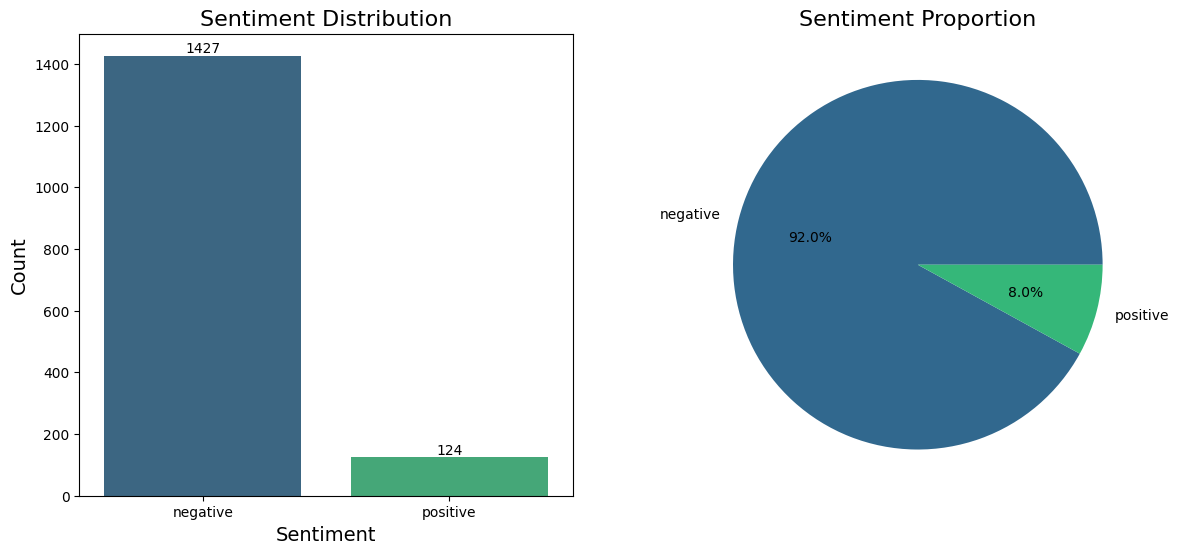

In [ ]:
# Hitung jumlah sentimen
sentiment_counts = df['sentiment'].value_counts()
sentiment_percent = df['sentiment'].value_counts(normalize=True) * 100

# Setup subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Barplot distribusi sentimen
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', ax=ax1)
ax1.set_title('Sentiment Distribution', fontsize=16)
ax1.set_xlabel('Sentiment', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Menambahkan angka di atas bar
for i in range(len(sentiment_counts)):
    ax1.text(i, sentiment_counts.values[i] + 0.5, str(sentiment_counts.values[i]), ha='center', va='bottom')

# Pie chart persentase proporsi sentimen
ax2.pie(sentiment_percent, labels=sentiment_percent.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_percent)))
ax2.set_title('Sentiment Proportion', fontsize=16)

In [ ]:
def generate_wordcloud(sentiment):
    # Filter teks berdasarkan sentimen
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_comments'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment', fontsize=16)
    plt.show()

In [ ]:
def most_common_words(sentiment, top_n=10):
    # Filter teks berdasarkan sentimen
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_comments'])
    words = text.split()

    # Hitung frekuensi kata
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)

    # Plot bar chart
    words, counts = zip(*most_common)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top {top_n} Most Common Words in {sentiment.capitalize()} Sentiment', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

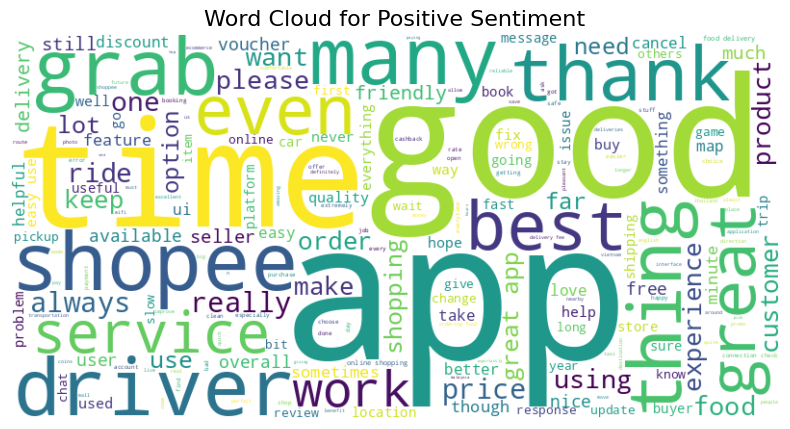

<ipython-input-46-38c16d422f34>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


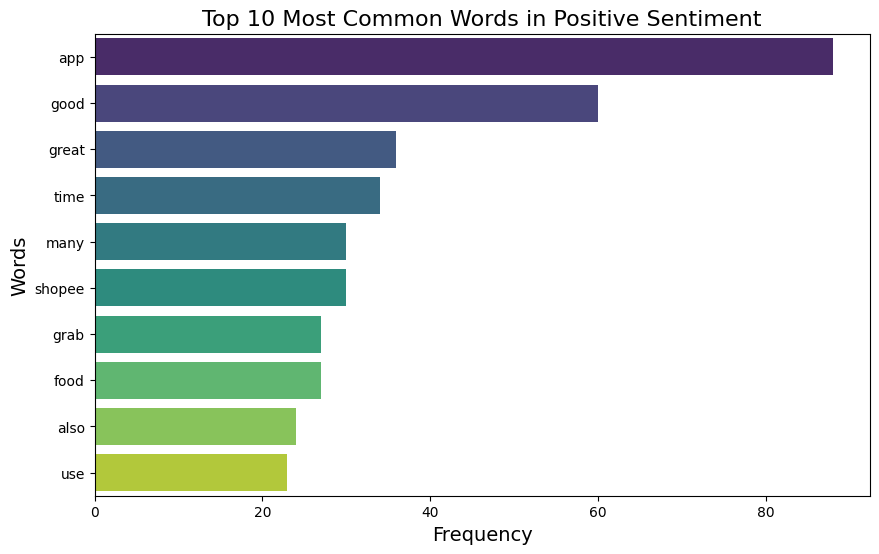

In [ ]:
# Generate word cloud untuk setiap sentimen
generate_wordcloud('positive')
most_common_words('positive')

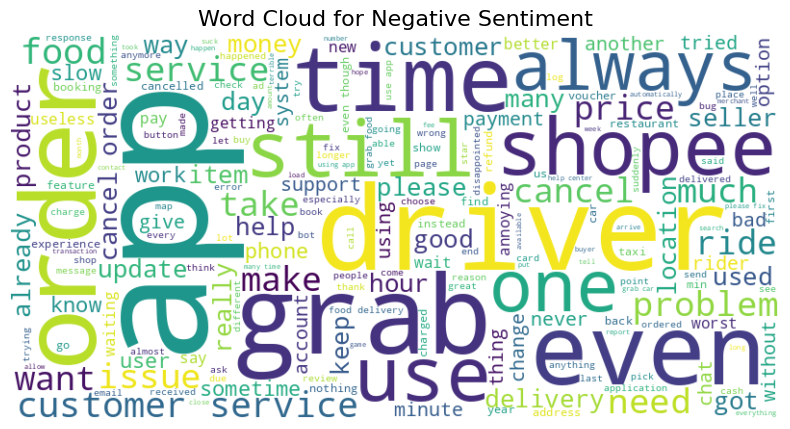

<ipython-input-46-38c16d422f34>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


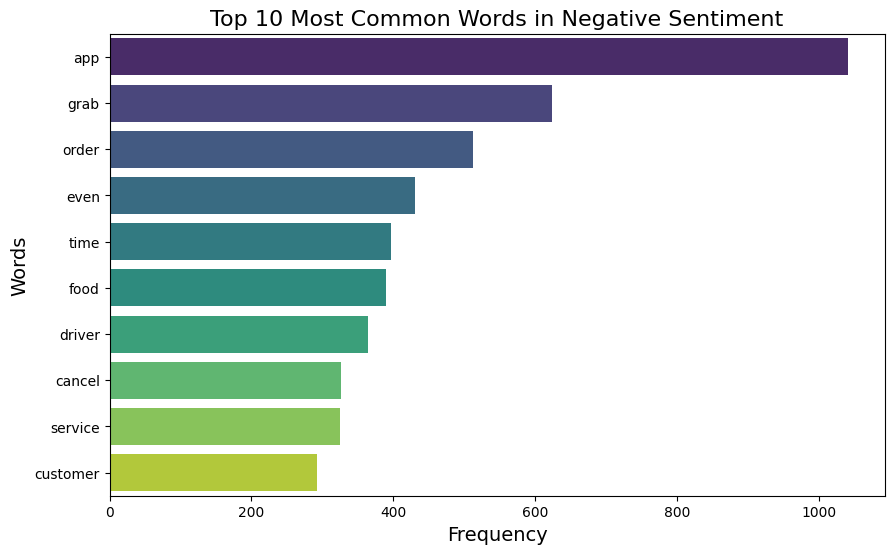

In [ ]:
generate_wordcloud('negative')
most_common_words('negative')

In [ ]:
# generate_wordcloud('neutral')
# most_common_words('neutral')

<ipython-input-50-1f4124dbb28c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'])


<Figure size 1200x600 with 0 Axes>

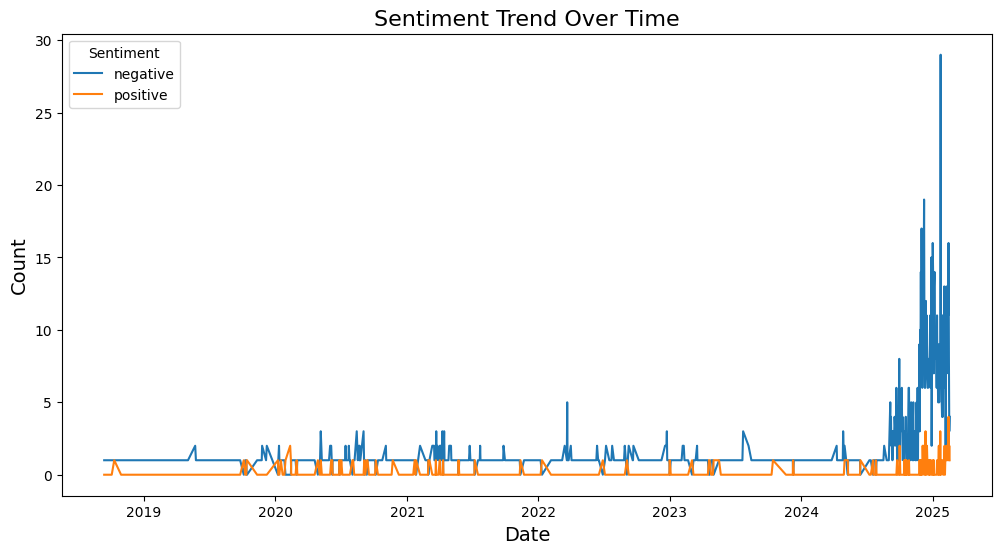

In [ ]:
# Ubah kolom Time menjadi datetime
df['Time'] = pd.to_datetime(df['Time'])

# Group by waktu dan hitung jumlah sentimen
sentiment_trend = df.groupby([df['Time'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Plot tren sentimen
plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# Find the minimum and maximum dates
time_range = (df['Time'].min(), df['Time'].max())

print(f'Time range: {time_range[0]} to {time_range[1]}')

Time range: 2018-09-12 00:00:00 to 2025-02-17 00:00:00


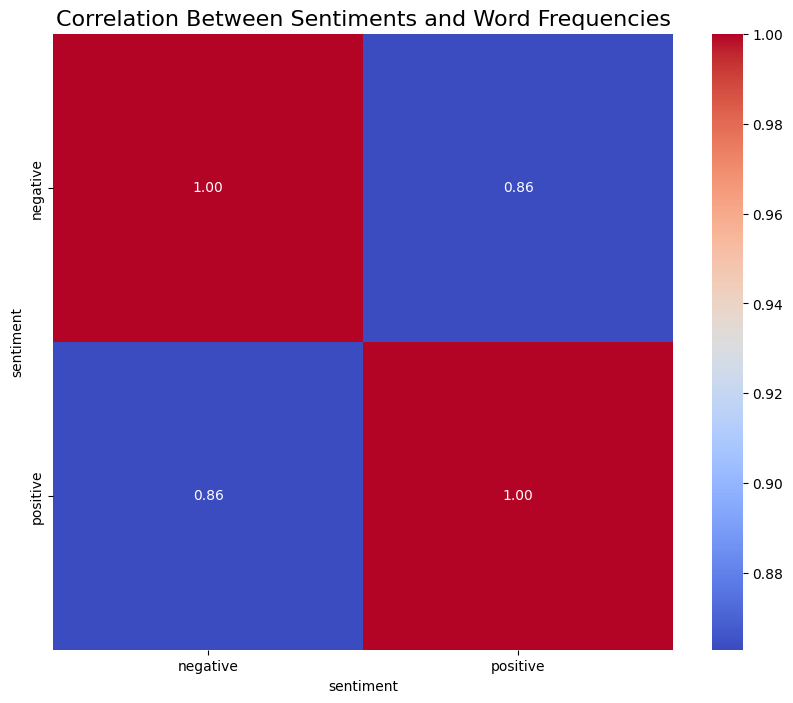

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize cleaned comments
vectorizer = CountVectorizer(max_features=10)
X = vectorizer.fit_transform(df['cleaned_comments'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Gabungkan dengan sentimen
word_freq['sentiment'] = df['sentiment']

# Hitung korelasi
correlation_matrix = word_freq.groupby('sentiment').mean().T.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiments and Word Frequencies', fontsize=16)
plt.show()

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
negative,1427
positive,124


# Modelling

In [ ]:
pip install transformers datasets torch scikit-learn pandas

## Splitting Data & Encoding

In [ ]:
# Convert sentiment labels to numerical values
label_mapping = {'positive': 1, 'negative': 0}
df['label'] = df['sentiment'].map(label_mapping)

<ipython-input-29-87339d247f85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['sentiment'].map(label_mapping)


In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_comments'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42
)

## Tokenize the Data

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training and testing data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Create PyTorch Datasets

In [ ]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

## Load a Pre-trained Model and Fine-tune It

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    report_to = 'none',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="epoch"
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.220600,0.204767
2,0.221100,0.085503
3,0.091400,0.084546


TrainOutput(global_step=234, training_loss=0.19587211387279707, metrics={'train_runtime': 194.0096, 'train_samples_per_second': 19.174, 'train_steps_per_second': 1.206, 'total_flos': 244693281484800.0, 'train_loss': 0.19587211387279707, 'epoch': 3.0})

In [ ]:
# Evaluate the model
results = trainer.evaluate()

print(f"Evaluation results: {results}")

Evaluation results: {'eval_loss': 0.08454570174217224, 'eval_runtime': 1.5488, 'eval_samples_per_second': 200.801, 'eval_steps_per_second': 12.913, 'epoch': 3.0}


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Get predicted labels
y_pred = np.argmax(predictions.predictions, axis=-1)

# Get true labels
y_true = predictions.label_ids

# Map numeric labels back to original sentiment strings
label2id = {'positive': 1, 'negative': 0}
id2label = {v: k for k, v in label2id.items()}  # Reverse mapping

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(id2label.values())))


Classification Report:
              precision    recall  f1-score   support

    positive       0.99      0.98      0.98       293
    negative       0.67      0.78      0.72        18

    accuracy                           0.96       311
   macro avg       0.83      0.88      0.85       311
weighted avg       0.97      0.96      0.97       311



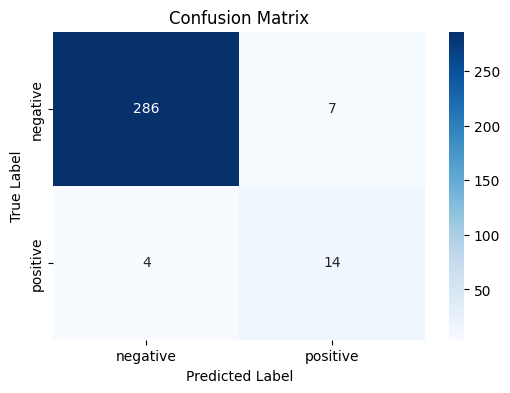

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Instantiate label names
label_names = ["negative", "positive"]  # or use id2label.values()

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_names,
    yticklabels=label_names
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**KESIMPULAN**

- Akurasi model sebesar 96%, menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan sentimen.

F1-score untuk sentimen positif = 0.98, menunjukkan model sangat akurat dalam mendeteksi ulasan positif.
F1-score untuk sentimen negatif = 0.72, menunjukkan bahwa model masih memiliki keterbatasan dalam menangkap ulasan negatif dengan benar.
Precision untuk negatif (0.67) lebih rendah dibandingkan recall (0.78), yang berarti model cenderung menangkap lebih banyak ulasan negatif tetapi dengan risiko false positive yang lebih tinggi.
Jumlah data ulasan negatif sangat sedikit (18 dari 311 ulasan), yang bisa menyebabkan model kurang optimal dalam mendeteksi sentimen negatif.

🔎 **Rekomendasi Investasi:**

📉 Perlu kehati-hatian dalam mempertimbangkan investasi pada perusahaan ini. Disarankan untuk:

✅ Melakukan analisis mendalam terhadap penyebab utama sentimen negatif.

✅ Membandingkan sentimen ini dengan data keuangan & performa saham perusahaan.

✅ Menunggu adanya perbaikan layanan atau strategi dari perusahaan sebelum mengambil keputusan investasi.

Jika tren sentimen negatif terus berlanjut, investasi pada perusahaan ini berisiko tinggi dan mungkin kurang ideal dalam strategi investasi jangka panjang. 🚨📊